In [1]:
#1 Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [3]:
#2.Import the train data
train_data=pd.read_csv("Week7_train.csv")
test_data=pd.read_csv("Week7_test.csv")

In [4]:
#3.check the shape of the data
print("shape of a train data ",train_data.shape)
print("shape of a test data ",test_data.shape)

shape of a train data  (42000, 785)
shape of a test data  (28000, 784)


In [5]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#4.select only 10% of the data from experiment.we will not use total data as KNN is
train_sample=train_data.sample(frac=0.1,random_state=42)
print("selected sample shape :",train_sample.shape)

selected sample shape : (4200, 785)


In [7]:
#5: Print Shape of the Selected Dataset
print(train_sample.shape)

(4200, 785)


In [8]:
# 6: Look at the Top 5 Rows
print(train_sample.head(5))


       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
5457       8       0       0       0       0       0       0       0       0   
38509      1       0       0       0       0       0       0       0       0   
25536      9       0       0       0       0       0       0       0       0   
31803      9       0       0       0       0       0       0       0       0   
39863      8       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
5457        0  ...         0         0         0         0         0   
38509       0  ...         0         0         0         0         0   
25536       0  ...         0         0         0         0         0   
31803       0  ...         0         0         0         0         0   
39863       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
5457          0         0   

In [15]:
#7: Find the Number of Unique Class Labels
num_classes = train_data["label"].nunique()  # Replace "target" with your actual label column name
unique_classes = train_data["label"].unique()
print("Number of Unique Class Labels:", unique_classes)
print("Number of Unique Class Labels:", num_classes)

Number of Unique Class Labels: [1 0 4 7 3 5 8 9 2 6]
Number of Unique Class Labels: 10


In [17]:
# 8: Print the Number of Examples for Each Class Label
class_counts = train_data['label'].value_counts()
print(class_counts)


label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


In [19]:
#9: Prepare X  and Y 
X=train_sample.iloc[:,1:]#all columns except last
y=train_sample.iloc[:,0]#last coulmn
y

5457     8
38509    1
25536    9
31803    9
39863    8
        ..
16041    4
4867     2
28123    7
3780     7
7155     5
Name: label, Length: 4200, dtype: int64

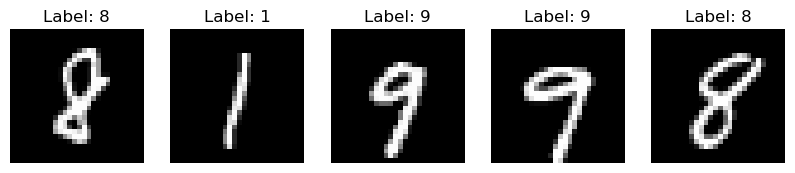

In [21]:
#10
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

def plot_images(X, y, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 3))
    for i, ax in enumerate(axes):
        ax.imshow(X.iloc[i].values.reshape(28, 28), cmap="gray")
        ax.set_title(f"Label: {y.iloc[i]}")
        ax.axis("off")
    plt.show()

# Make sure to pass the correct variable name
plot_images(X, y)




In [31]:
#11: Split the Dataset into Training (75%) and Validation (25%)
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.25, random_state=42)


In [35]:
#12: Fit KNN Classifier to Training Data
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [27]:
# 13: Default Parameters (Already Set Above)

print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [151]:
#14: Predict the Validation Set Results
Y_pred = knn.predict(X_val)
Y_pred

array([9, 3, 6, ..., 1, 7, 9])

In [153]:
 #15: Print the Confusion Matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_val, Y_pred))

Confusion Matrix:
[[ 97   0   0   1   0   1   2   0   0   0]
 [  0 118   0   0   0   0   0   0   0   0]
 [  0   6  81   0   0   0   0   3   0   0]
 [  0   0   1 122   0   4   0   1   1   3]
 [  0   0   0   0  88   0   2   0   0   5]
 [  0   1   0   2   0  80   1   1   0   0]
 [  0   1   0   0   0   0  98   0   0   0]
 [  0   9   1   0   0   0   0 104   0   4]
 [  0   5   1   3   0   1   2   2  89   3]
 [  1   2   0   1   3   0   0   5   0  94]]


In [155]:
# 16: Print Classification Report and Accuracy

print("Classification Report:")
print(classification_report(Y_val, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       101
           1       0.83      1.00      0.91       118
           2       0.96      0.90      0.93        90
           3       0.95      0.92      0.93       132
           4       0.97      0.93      0.95        95
           5       0.93      0.94      0.94        85
           6       0.93      0.99      0.96        99
           7       0.90      0.88      0.89       118
           8       0.99      0.84      0.91       106
           9       0.86      0.89      0.87       106

    accuracy                           0.92      1050
   macro avg       0.93      0.92      0.93      1050
weighted avg       0.93      0.92      0.92      1050



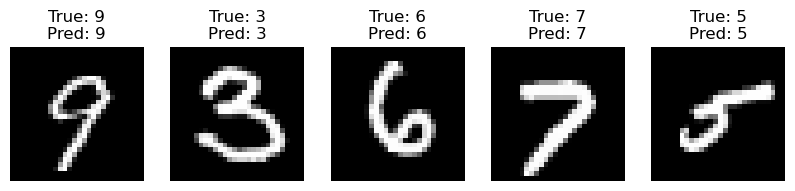

In [161]:
#17: Visualize the First 5 Digits in X-Test and Print the Predicted Labels
def plot_predicted_images(X, y_true, y_pred, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 3))
    for i, ax in enumerate(axes):
        ax.imshow(X.iloc[i].values.reshape(28, 28), cmap="gray")  # Reshape if needed
        ax.set_title(f"True: {y_true.iloc[i]}\nPred: {y_pred[i]}")
        ax.axis("off")
    plt.show()

plot_predicted_images(X_val, Y_val, Y_pred)
